## Bigram

As an example of a simple language model, we want to generate names using the bigram method. The idea is that we:<br>
<br>
1) download a dataset containing many different names<br>
2) derive the relative frequency of each letter followed by another specific letter in these names and plot a matrix of these frequencies.<br>
3) generate new names, based on these frequencies and compare the result to a completely random model<br>
<br>

First, we call the required libraries...

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import matplotlib.pyplot as plt

and download the dataset $names$ from the GitHub repository of [Andrej Karpathy](https://en.wikipedia.org/wiki/Andrej_Karpathy)

We are ready for the creating the model now.

In [9]:
class BiGramModel():
    
    #retrieving data
    def __init__(self, *dataset: str):

        if dataset:
            for dataset in dataset:
                names = open(dataset, 'r').read().splitlines()

        else:
            my_url = 'https://raw.githubusercontent.com/karpathy/makemore/master/names.txt'

            with urllib.request.urlopen(my_url) as f:
                names_text = f.read().decode('utf-8')
            names = names_text.split()
        
        self.names = names
        
        
    def CreateBiGramMatrix(self):
        
        #1) creating an alphabet of all token
        chars = sorted(list(set(''.join(self.names))))
        chars += ['<S>'] + ['<E>'] #adding end and start token
        SizeA = len(chars)         #size of the alphabet = number of token
        print(str(SizeA) + ' different token')

        #2) creating dictionary from string to numbers and vice versa
        stoi = { ch: i  for i, ch in enumerate(chars)}
        itos = { i : ch for i, ch in enumerate(chars)}
        
        #3) creating matrix for frequencies
        N = np.zeros((SizeA, SizeA))

        for n in self.names:
            nL = ['<S>'] + list(n) + ['<E>']
            for char1, char2 in zip(nL, nL[1:]):
                idx1 = stoi[char1]
                idx2 = stoi[char2]
                N[idx1,idx2] += 1

        #frequencies --> probabilities
        Nsam = N/np.sum(N+0.0001, axis = 1, keepdims = True)
                

        #plotting N##########################################################
        Ndf   = pd.DataFrame(Nsam*100, columns = chars)

        plt.figure(figsize = (len(chars)/2,len(chars)/2))
        sns.heatmap(Ndf, cmap = 'Blues', annot = False, yticklabels = chars,\
                    cbar_kws={'label': 'rel frequency [%]'})
        plt.savefig('bigram_names.pdf')
        #####################################################################
        
        self.Nsam = Nsam
        self.itos = itos
        
        
    def SampleNames(self, Nnames = 10, NotRandom = True):
        
        itos  = self.itos
        Nsam  = self.Nsam
        Nchar = N.shape[0]

        #generating ten names based on N or randomly
        for i in range(Nnames):
            
            out = []
            idx = Nchar-2#starting with the start symbol       
            
            while True:
                if NotRandom:
                    p   = Nsam[idx,:]
                    # drawing token randomly, based on Nsam, returns 1 or zeror
                    idx = np.argmax(np.random.multinomial(1,p))
                    
                else:
                    #random model as comparison
                    idx = np.random.randint(0, Nchar)#upper value is EXCLUSIVE               
              
                if idx == Nchar-1: #end symbol
                    break
                
                out.append(itos[idx])
            
            print(''.join(out))

We run the __init__ in order to recive the data.

In [11]:
B = BiGramModel()

Checking the first ten names in the corpus:

In [13]:
print(B.names[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


Creating the frequency matrix and plotting it:

28 different token


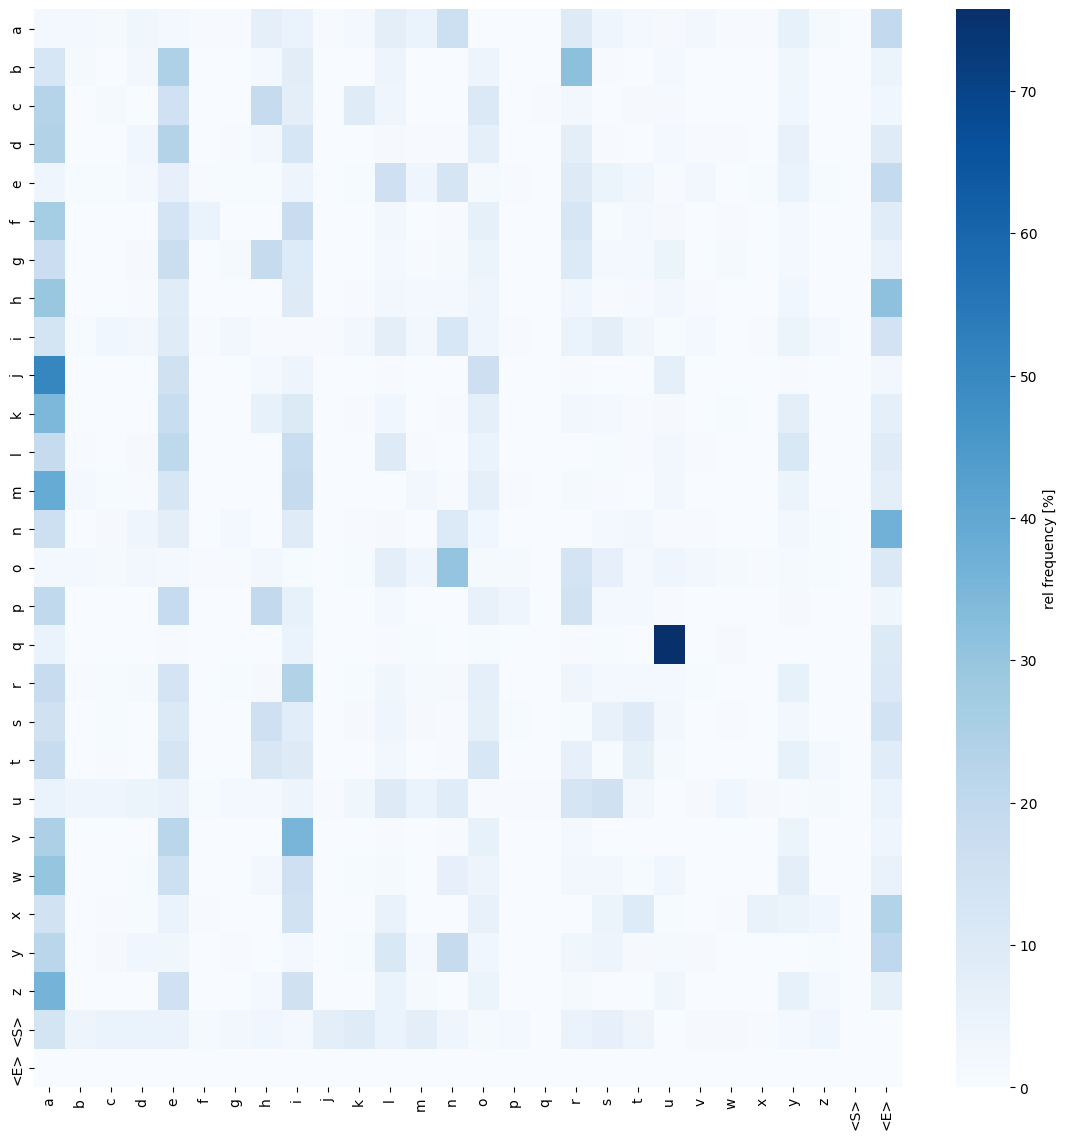

In [15]:
B.CreateBiGramMatrix() 

We can see, that many combinations are more frequent than other combinations. Therefore, we can predict a token based on the previous one to some degree. In order to measure the amount of information we gained, we can calculate the entropy of the bigram matrix and compare it to a random sampling.

In [17]:
Ntoken = len(B.Nsam[:,0])

In [19]:
S_rand = (Ntoken**2)*np.log(Ntoken)/Ntoken
print(S_rand)

93.30172628490571


In [21]:
N = B.Nsam

In [23]:
S_bi = 0
for i in range(Ntoken):
    S_bi += np.sum(-N[:,i]*np.log(N[:,i]+1e-16))
print(S_bi)

59.8183421916877


We gained a bit less than a factor of two, which is pretty common for Germanic languages.<br>
Let us now generate names randomly. First, based on our model...

In [25]:
Nnames = 15
B.SampleNames(Nnames)

chayahlibe
aeomitowaer
fasmisheriyrcelyidyn
ca
ah
nai
chanamadudyzayulen
jabron
selom
reishain
n
lon
jan
masan
jan


...and now compared to a random sampling:

In [27]:
B.SampleNames(Nnames, NotRandom=False)

mtzzgwwdmyewyvqkzkighrqoreyzbdidlgsk
odpvxkepd<S>msmbb
dhgsys
htlcg
ovlely<S>j
ceaooftnhgwdjirfvyllcazi
crpzvchb<S>
kizczrfxov<S>y<S><S>sjqswfdlbajydaqlq
no
uwxzatzutekc<S>iwszgc
hdly<S>cgvzba<S>dwhftiefevdjxwqekv<S>nsak
tjyarptmylgshjsornsrapvixoluf<S>a<S>ievviqlmfblpgnnz
q
jovtmgguvuzla<S>g



Eventhough our model is pretty simple, we can clearly see a significant improvement!